In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Br = pd.read_csv("Brain data (only mammals).csv")
Br.head(8)

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African sheath-tailed bat,0.0899,0.0540,0.098,"5,080,000","47,984,000","5,514,000",11.5
2,Little free-tailed bat,0.0840,0.0360,0.084,"5,632,000","25,324,000","4,001,000",5.4
3,Rufous trident bat,0.0930,0.0720,0.084,"6,039,000","59,651,000","4,072,000",13.7
4,Common bent-wing bat,0.0858,0.0485,0.086,"6,116,000","44,447,000","5,094,000",11.6
5,Naked mole-rat,0.1840,0.0480,0.160,"6,150,000","15,740,000","4,980,000",35.3
6,Commerson's roundleaf bat,0.2430,0.1070,0.237,"7,877,000","51,875,000","6,965,000",101.9
7,Smoky shrew,0.0840,0.0200,0.072,"9,730,000","20,870,000","5,560,000",7.5


In [3]:
Br = Br.dropna()

In [4]:
Br.dtypes

Animal       object
Forebr m    float64
Cer m       float64
rest m      float64
Forebr n     object
Cer n        object
Rest n       object
Body m      float64
dtype: object

In [5]:
Br.head(7)

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m
1,African sheath-tailed bat,0.0899,0.0540,0.098,"5,080,000","47,984,000","5,514,000",11.5
2,Little free-tailed bat,0.0840,0.0360,0.084,"5,632,000","25,324,000","4,001,000",5.4
3,Rufous trident bat,0.0930,0.0720,0.084,"6,039,000","59,651,000","4,072,000",13.7
4,Common bent-wing bat,0.0858,0.0485,0.086,"6,116,000","44,447,000","5,094,000",11.6
5,Naked mole-rat,0.1840,0.0480,0.160,"6,150,000","15,740,000","4,980,000",35.3
6,Commerson's roundleaf bat,0.2430,0.1070,0.237,"7,877,000","51,875,000","6,965,000",101.9
7,Smoky shrew,0.0840,0.0200,0.072,"9,730,000","20,870,000","5,560,000",7.5


In [6]:
if Br['Forebr n'].dtype != 'float64': 
     Br['Forebr n'] = Br['Forebr n'].str.replace(',', '').astype(float)
if Br['Cer n'].dtype != 'float64':
     Br['Cer n'] = Br['Cer n'].str.replace(',', '').astype(float)
if Br['Rest n'].dtype != 'float64':
     Br['Rest n'] = Br['Rest n'].str.replace(',', '').astype(float)

In [7]:
Br.dtypes

Animal       object
Forebr m    float64
Cer m       float64
rest m      float64
Forebr n    float64
Cer n       float64
Rest n      float64
Body m      float64
dtype: object

In [8]:
Br.head(5)

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m
1,African sheath-tailed bat,0.0899,0.0540,0.098,5080000.0,47984000.0,5514000.0,11.5
2,Little free-tailed bat,0.0840,0.0360,0.084,5632000.0,25324000.0,4001000.0,5.4
3,Rufous trident bat,0.0930,0.0720,0.084,6039000.0,59651000.0,4072000.0,13.7
4,Common bent-wing bat,0.0858,0.0485,0.086,6116000.0,44447000.0,5094000.0,11.6
5,Naked mole-rat,0.1840,0.0480,0.160,6150000.0,15740000.0,4980000.0,35.3


In [9]:
X = Br[["Forebr m", "Cer m", "rest m", "Body m"]]
Y1 = Br["Forebr n"]
Y2 = Br["Cer n"]
Y3 = Br["Rest n"]

In [10]:
x_train, x_test, y_train1, y_test1 = train_test_split(X, Y1, test_size=0.25)

In [13]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 189, 328, 467, 607, 746, 885, 1025, 1164, 1303, 1442, 1582, 1721, 1860, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
regrneo = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = regrneo, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [15]:
regrneo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
rf_random.fit(x_train, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 189, 328, 467, 607,
                                                         746, 885, 1025, 1164,
                                                         1303, 1442, 1582, 1721,
                                                         1860, 2000]},
                   random_state=42, verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    errors2 = mean_squared_error(test_labels, predictions, squared=False)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    accuracy2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} '.format(np.mean(errors)))
    print('Root Mean Squared Error: {:0.4f} '.format(np.mean(errors2)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('r2 score = {:0.2f}'.format(accuracy2))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train1)
base_accuracy = evaluate(base_model, x_test, y_test1)

Model Performance
Average Error: 179647628.5714 
Root Mean Squared Error: 238345516.4925 
Accuracy = -16.15%.
r2 score = 0.83


In [20]:
# Killer whale
base_model.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.3272e+09])

In [21]:
# Orangutan
base_model.predict([[414, 35, 40, 64475]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.677563e+09])

In [22]:
# Human(included in data)
base_model.predict([[1200, 150, 120, 70000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.2269e+10])

In [19]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test1)

Model Performance
Average Error: 776821153.7668 
Root Mean Squared Error: 1263410137.4261 
Accuracy = -126.51%.
r2 score = -3.90


In [24]:
# Killer whale
best_random.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.52511171e+09])

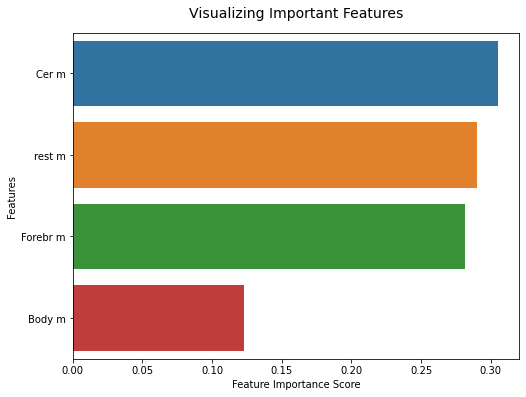

In [74]:
fig00 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(best_random.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [39]:
filename = "best_random_model_forest.pickle"
pickle.dump(best_random, open(filename, "wb"))

In [23]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 20, 50],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [5, 10, 25, 50]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [26]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train1)
grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 5}

In [27]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test1)

Model Performance
Average Error: 287213348.1973 
Root Mean Squared Error: 452234470.8109 
Accuracy = -31.62%.
r2 score = 0.37


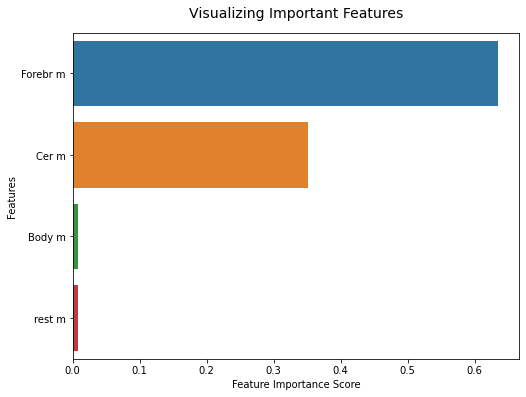

In [75]:
fig01 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(best_grid.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [28]:
# Killer whale
best_grid.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.65068933e+09])

In [29]:
# Orangutan
best_grid.predict([[414, 35, 40, 64475]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.24837389e+09])

In [30]:
# Human(included in data)
best_grid.predict([[1200, 150, 120, 70000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.624066e+09])

In [31]:
# Short-finned pilot whale
best_grid.predict([[2431, 403, 91, 2200000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.624066e+09])

In [33]:
regrneo.fit(x_train, y_train1)
regrneo.predict(x_test)

array([1.9272588e+09, 2.8228560e+08, 1.2141005e+09, 1.6954000e+07,
       8.3089920e+08, 1.2190284e+09, 1.6938450e+08, 1.9060090e+07,
       1.3561511e+09, 1.1444824e+09, 2.7184810e+08, 1.1899710e+07,
       1.6450940e+08, 7.4690600e+06])

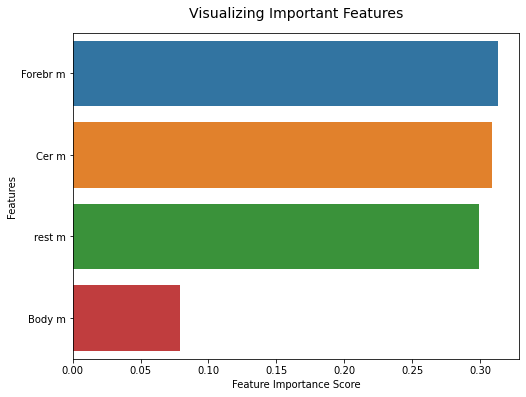

In [76]:
fig02 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regrneo.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [34]:
mean_squared_error(y_test1, regrneo.predict(x_test))

1.7150803168581117e+17

In [35]:
r2_score(y_test1, regrneo.predict(x_test))

0.47395509425958815

In [36]:
# Human(included in data)
regrneo.predict([[1200, 150, 120, 70000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.11425211e+10])

In [37]:
# Killer whale
regrneo.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.3659572e+09])

In [38]:
# Orangutan
regrneo.predict([[414, 35, 40, 64475]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.4318369e+09])

In [40]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [41]:
for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(x_train,y_train1).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor,x_train,y_train1,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 -7.045617044754195e+18
2 -7.897447157911405e+18
3 -7.952330648470205e+18
4 -7.984991905963363e+18
5 -7.975611193928655e+18
6 -7.951777084821367e+18
7 -7.885622029868067e+18
8 -7.914536257623288e+18
9 -7.899671168875837e+18


In [42]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [48]:
search.fit(x_train,y_train1)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error')

In [49]:
search.best_params_

{'learning_rate': 0.001,
 'max_depth': 1,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

In [50]:
search.best_score_

-5.836033117660348e+18

In [51]:
GBR2=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.001,subsample=.5,max_depth=1,random_state=1)
score=np.mean(cross_val_score(GBR2,x_train,y_train1,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-5.836033117660348e+18

In [52]:
GBR2.fit(x_train, y_train1)

GradientBoostingRegressor(learning_rate=0.001, max_depth=1, n_estimators=1000,
                          random_state=1, subsample=0.5)

In [56]:
filename = "GBR2_1.pickle"
pickle.dump(GBR2, open(filename, "wb"))

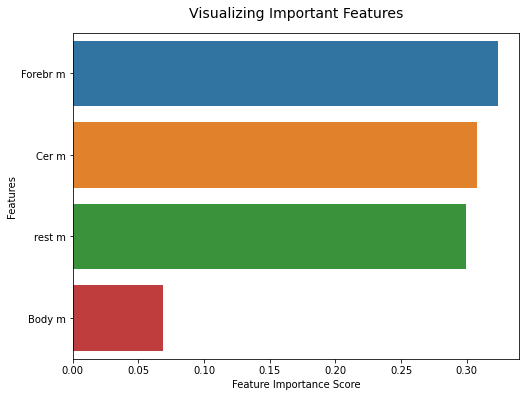

In [77]:
fig03 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(GBR2.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [53]:
# Human(included in data)
GBR2.predict([[1200, 150, 120, 70000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([6.26766059e+09])

In [54]:
# Killer whale
GBR2.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([6.36995466e+09])

In [55]:
GBR3=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1,subsample=.75,max_depth=1,random_state=1)
score=np.mean(cross_val_score(GBR2,x_test,y_test1,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-3.904561127421674e+17

In [58]:
regrneo2 = GradientBoostingRegressor(random_state=0)

In [59]:
regrneo2.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [60]:
regrneo2.fit(x_train, y_train1)

GradientBoostingRegressor(random_state=0)

In [61]:
regrneo2.predict(x_test)

array([1.31633534e+09, 2.19746424e+08, 1.12131110e+09, 1.57376759e+07,
       7.20483597e+08, 1.57167983e+09, 1.55940867e+08, 1.76638213e+07,
       2.07452880e+09, 1.12131110e+09, 2.19746424e+08, 1.25460040e+07,
       1.57336692e+08, 8.79859390e+06])

In [62]:
mean_squared_error(y_test1, regrneo2.predict(x_test))

2.6020310403453405e+17

In [63]:
r2_score(y_test1, regrneo2.predict(x_test))

0.20191191053979674

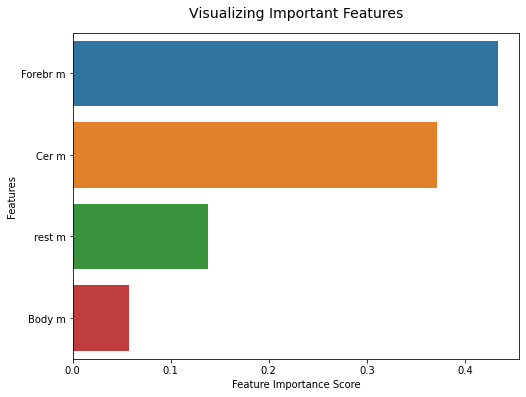

In [78]:
fig04 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regrneo2.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [64]:
# Human(included in data)
regrneo2.predict([[1200, 150, 120, 70000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.63320476e+10])

In [65]:
# Killer whale
regrneo2.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([8.83325397e+09])

In [66]:
# Bowhead whale
regrneo2.predict([[2383, 575, 205, 100000000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.06106673e+10])

In [67]:
# Orangutan
regrneo2.predict([[414, 35, 40, 64475]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([2.41945113e+09])

In [68]:
# Short-finned pilot whale
regrneo2.predict([[2431, 403, 91, 2200000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([9.66712626e+09])

In [69]:
# Bottlenose dolphin
regrneo2.predict([[1519, 301, 90, 200000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.30507936e+10])

In [70]:
# Sperm whale
regrneo2.predict([[7466, 550, 184, 28500000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.06106673e+10])

In [71]:
# Beluga whale
regrneo2.predict([[1830, 301, 69, 1430000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.30507936e+10])

In [72]:
x_test

,Forebr m,Cer m,rest m,Body m
51,398.808,67.730,70.680,800000.0
31,9.290,1.548,3.454,1332.0
41,67.450,14.032,17.732,40000.0
6,0.243,0.107,0.237,101.9
36,222.000,45.106,47.898,277500.0
50,69.832,7.694,9.204,8235.0
26,3.123,0.920,1.386,809.0
22,0.476,0.153,0.370,90.0
44,111.310,13.402,30.006,84500.0
38,68.806,11.458,25.810,39000.0


In [79]:
x_train, x_test, y_train2, y_test2 = train_test_split(X, Y2, test_size=0.25)

In [80]:
regrcer = RandomForestRegressor()

In [81]:
regrcer.fit(x_train, y_train2)

RandomForestRegressor()

In [82]:
mean_squared_error(y_test2, regrcer.predict(x_test))

2.778474915035531e+21

In [83]:
r2_score(y_test2, regrcer.predict(x_test))

0.32715015116404134

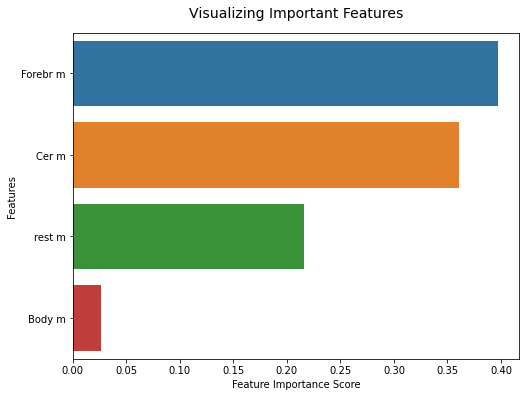

In [84]:
fig05 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regrcer.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [85]:
# Human(included in data)
regrcer.predict([[1200, 150, 120, 70000]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.351321e+10])

In [86]:
# Killer whale
regrcer.predict([[5270, 753, 192, 3987500]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.358043e+10])

In [87]:
# Orangutan
regrcer.predict([[414, 35, 40, 64475]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.47664e+09])